In [14]:
#Import Dependecies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as py
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

In [15]:
# File to Load 
Iris_Data_Load = Path("iris.data")

# Read Iris Data File and store into Pandas DataFrames
Iris_Data = pd.read_csv(Iris_Data_Load)

#Assign the Column Names(Attributes)
Iris_Data.columns=[" Sepal_Length","Sepal_Width","Petal_Length","Petal_Width ","Class_Iris"]

# Display the dataset
Iris_Data.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class_Iris
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [16]:
# Separate the data into labels and features
# the y variable, the labels
y = Iris_Data["Class_Iris"]

# Separate the X variable, the features
X = Iris_Data.drop(columns=["Class_Iris"])

In [17]:
# Review the y variable DataFrame
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class_Iris, dtype: object

In [18]:
# Review the X variable DataFrame
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


## Step 3: Split the data into training and testing datasets by using train_test_split

In [19]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
test_size = 0.25  # 25% of data for testing
random_state = 1  # Ensures reproducibility

# Assign a random_state of 1 to ensure reproducibility
# Assign a random_state of 1 to the function  ?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Display the resulting shapes to verify the split
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (111, 4)
Testing features shape: (38, 4)
Training labels shape: (111,)
Testing labels shape: (38,)


## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`)

In [20]:
# Import the LogisticRegression module from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to ensure reproducibility
logistic_model = LogisticRegression(random_state=1, max_iter=500)

# Fit the model using the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model

In [31]:
# Make a prediction using the testing data
# Step 2: Make predictions using the testing data
y_pred = logistic_model.predict(X_test)
y_pred[:9]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [27]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13  0  0]
 [ 0 14  0]
 [ 0  1 10]]


In [28]:
#Data shown in Tubulate table
conf_matrix_table = [
    ["Actual Iris-virginica", conf_matrix[0][0], conf_matrix[0][1], conf_matrix[0][2]],
    ["Actual Iris-versicolor", conf_matrix[1][0], conf_matrix[1][1], conf_matrix[1][2]],
    ["Actual Iris-setosa", conf_matrix[2][0], conf_matrix[2][1], conf_matrix[2][2]],

]

# Header for tabulate
headers = ["", "Iris-virginica", "Iris-versicolor", "Iris-setosa"]

# Display the confusion matrix using tabulate
print("                          Confusion Matrix Table ")
print(tabulate(conf_matrix_table, headers=headers, tablefmt="grid"))

                          Confusion Matrix Table 
+------------------------+------------------+-------------------+---------------+
|                        |   Iris-virginica |   Iris-versicolor |   Iris-setosa |
+========================+==================+===================+===============+
| Actual Iris-virginica  |               13 |                 0 |             0 |
+------------------------+------------------+-------------------+---------------+
| Actual Iris-versicolor |                0 |                14 |             0 |
+------------------------+------------------+-------------------+---------------+
| Actual Iris-setosa     |                0 |                 1 |            10 |
+------------------------+------------------+-------------------+---------------+


In [29]:
from sklearn.metrics import classification_report
import IPython
# Print the classification report for the model
class_report = classification_report(y_test, y_pred)
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary to a DataFrame
class_report_df = pd.DataFrame(report_dict).transpose()
print("                  Classification Report")
IPython.display.display(class_report_df)

                  Classification Report


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,13.000000
Iris-versicolor,0.933333,1.000000,0.965517,14.000000
Iris-virginica,1.000000,0.909091,0.952381,11.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.977778,0.969697,0.972633,38.000000
weighted avg,0.975439,0.973684,0.973511,38.000000


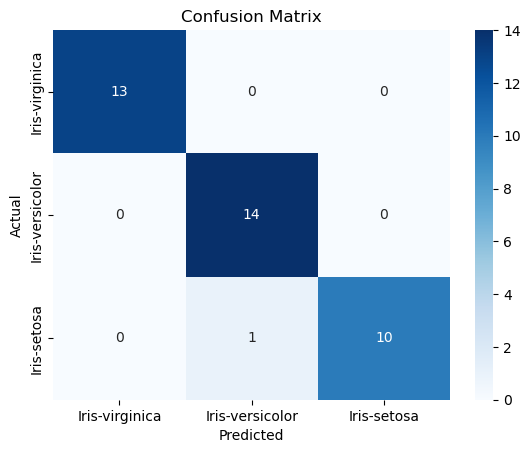

In [33]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-virginica', 'Iris-versicolor','Iris-setosa'], yticklabels=['Iris-virginica', 'Iris-versicolor','Iris-setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# Save and display the table
plt.savefig("heat map", dpi=300, bbox_inches='tight')
plt.show()
